In [138]:
import numpy as np #mathematical stff
import pandas as pd # data analysis
import matplotlib.pyplot as plt #Data visulization
import seaborn as sns #data visulization
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
!pip install sweetviz
import sweetviz as sv # graphs
!pip install num2words
from num2words import num2words

In [139]:
df=pd.read_csv("Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,100,101,101,101,100,2,100,10
1,12250000,8960,4,4,4,100,101,101,101,100,3,101,10
2,12250000,9960,3,2,2,100,101,100,101,101,2,100,11
3,12215000,7500,4,2,2,100,101,100,101,100,3,100,10
4,11410000,7420,4,1,2,100,100,100,101,100,2,101,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,100,101,100,101,101,2,101,12
541,1767150,2400,3,1,1,101,101,101,101,101,0,101,11
542,1750000,3620,2,1,1,100,101,101,101,101,0,101,12
543,1750000,2910,3,1,1,101,101,101,101,101,0,101,10


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


In [141]:
df.shape

(545, 13)

In [142]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,100.141284,100.822018,100.649541,100.954128,100.684404,0.693578,100.765138,11.069725
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.000000,100.000000,10.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,100.000000,101.000000,100.000000,101.000000,100.000000,0.000000,101.000000,10.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,100.000000,101.000000,101.000000,101.000000,101.000000,0.000000,101.000000,11.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,100.000000,101.000000,101.000000,101.000000,101.000000,1.000000,101.000000,12.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,101.000000,101.000000,101.000000,101.000000,101.000000,3.000000,101.000000,12.000000


In [143]:
df.describe().apply(lambda s: s.apply('{0:.7f}'.format))

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000
mean,4766729.2477064,5150.5412844,2.9651376,1.2862385,1.8055046,100.1412844,100.8220183,100.6495413,100.9541284,100.6844037,0.6935780,100.7651376,11.0697248
std,1870439.6156574,2170.1410225,0.7380639,0.5024696,0.8674925,0.3486347,0.3828487,0.4775519,0.2093987,0.4651799,0.8615858,0.4243022,0.7613727
min,1750000.0000000,1650.0000000,1.0000000,1.0000000,1.0000000,100.0000000,100.0000000,100.0000000,100.0000000,100.0000000,0.0000000,100.0000000,10.0000000
25%,3430000.0000000,3600.0000000,2.0000000,1.0000000,1.0000000,100.0000000,101.0000000,100.0000000,101.0000000,100.0000000,0.0000000,101.0000000,10.0000000
50%,4340000.0000000,4600.0000000,3.0000000,1.0000000,2.0000000,100.0000000,101.0000000,101.0000000,101.0000000,101.0000000,0.0000000,101.0000000,11.0000000
75%,5740000.0000000,6360.0000000,3.0000000,2.0000000,2.0000000,100.0000000,101.0000000,101.0000000,101.0000000,101.0000000,1.0000000,101.0000000,12.0000000
max,13300000.0000000,16200.0000000,6.0000000,4.0000000,4.0000000,101.0000000,101.0000000,101.0000000,101.0000000,101.0000000,3.0000000,101.0000000,12.0000000


In [144]:
df.notnull()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,True,True,True,True,True,True,True,True,True,True,True,True,True
541,True,True,True,True,True,True,True,True,True,True,True,True,True
542,True,True,True,True,True,True,True,True,True,True,True,True,True
543,True,True,True,True,True,True,True,True,True,True,True,True,True


In [145]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [146]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [147]:
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

Changing The value of yes,no,fursnihed,semi-furnished,unfursnished to numbers# New Section

In [148]:
df.replace(to_replace="yes",
           value=100,
           inplace=True)
df.replace(to_replace="no",
          value=101,
          inplace=True)
df.replace(to_replace="furnished",
          value=10,
          inplace=True)
df.replace(to_replace="semi-furnished",
          value=11,
          inplace=True)
df.replace(to_replace="unfurnished",
          value=12,
          inplace=True)

df.to_csv('Housing.csv',
          index=False)

In [149]:
df['mainroad']=df['mainroad'].astype(int)
df['guestroom']=df['guestroom'].astype(int)
df['basement']=df['basement'].astype(int)
df['hotwaterheating']=df['hotwaterheating'].astype(int)
df['airconditioning']=df['airconditioning'].astype(int)
df['prefarea']=df['prefarea'].astype(int)
df['furnishingstatus']=df['furnishingstatus'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int32
 6   guestroom         545 non-null    int32
 7   basement          545 non-null    int32
 8   hotwaterheating   545 non-null    int32
 9   airconditioning   545 non-null    int32
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int32
 12  furnishingstatus  545 non-null    int32
dtypes: int32(7), int64(6)
memory usage: 40.6 KB


In [150]:
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,100,101,101,101,100,2,100,10
1,12250000,8960,4,4,4,100,101,101,101,100,3,101,10
2,12250000,9960,3,2,2,100,101,100,101,101,2,100,11
3,12215000,7500,4,2,2,100,101,100,101,100,3,100,10
4,11410000,7420,4,1,2,100,100,100,101,100,2,101,10


In [151]:
#report=sv.analyze(df)
#report.show_html("./report.html")

In [152]:
#plt.subplots(figsize=(20,10))  
#corelation=df.corr()
#sns.heatmap(corelation,annot=True)

In [153]:
#sns.pairplot(data=df, diag_kind='kde')

Spliting and Training

In [154]:
x=df.drop(['price'],axis=1)
y=df['price']

In [155]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4345)

In [156]:
model=LinearRegression()
model.fit(x_train.values,y_train)

LinearRegression()

In [157]:
#y_pred=model.predict(np.array([x_test]).reshape(-1,1))
y_pred=model.predict(x_test.values)

In [158]:
y_test

136    5740000
80     6629000
47     7490000
526    2310000
200    4900000
        ...   
404    3493000
8      9870000
151    5565000
69     6790000
98     6293000
Name: price, Length: 109, dtype: int64

In [159]:
y_train

434    3290000
292    4200000
174    5250000
112    6083000
276    4305000
        ...   
542    1750000
215    4830000
121    5950000
165    5383000
272    4340000
Name: price, Length: 436, dtype: int64

# New Section
Giving input to predict the price

In [160]:
inp=np.array([7420,	4,	2,	3,	'yes','no','no',	'no',	'yes',	2,	'yes','furnished'])
for i in range(inp.__len__()):
  if(inp[i]=='yes'):
    inp[i]=100
  elif(inp[i]=='no'):
    inp[i]=101
  elif(inp[i]=='furnished'):
    inp[i]=10
  elif(inp[i]=='semi-furnished'):
    inp[i]=11
  elif(inp[i]=='unfurnished'):
    inp[i]=12
inp=inp.astype(int)
ip=inp.reshape(1,-1)
a=int(model.predict(ip))
print("The value of the house is:",a,"\n in words(",num2words(a, to = 'ordinal'),")")

The value of the house is: 8231322 
 in words( eight million, two hundred and thirty-one thousand, three hundred and twenty-second )


In [161]:
accuracy=r2_score(y_test,y_pred)*100
print("The accuracy of the program is:",accuracy,"%")

The accuracy of the program is: 83.18818043355162 %


In [162]:
model.intercept_

329247036.6593308

In [163]:
pred_y_df=pd.DataFrame({'Actual Value':y_test,'Predicted value':y_pred,'Difference':y_test-y_pred})
pred_y_df['Predicted value'] = pred_y_df['Predicted value'].map('{:,.2f}'.format)
pred_y_df[0:5]

,Actual Value,Predicted value,Difference
136,5740000,"6,291,148.79",-551148.790261
80,6629000,"5,684,169.65",944830.352582
47,7490000,"7,709,114.88",-219114.883750
526,2310000,"2,587,718.11",-277718.105124
200,4900000,"4,867,997.59",32002.407018


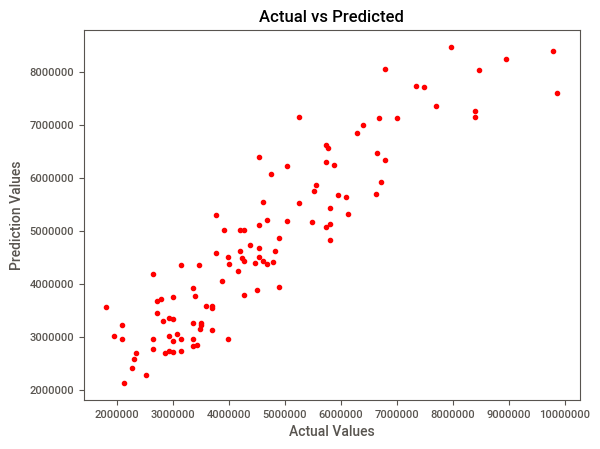

In [164]:
y_test=np.array(y_test)
y_pred=np.array(y_pred)
plt.scatter(y_test,y_pred,color='red')
plt.xlabel('Actual Values')
plt.ylabel('Prediction Values')
plt.title('Actual vs Predicted')
plt.ticklabel_format(useOffset=False,style='plain')
plt.show()

In [165]:
import pickle


with open('model.pkl','wb') as files:
    pickle.dump(model,files) 